### Read cell info and TMM

In [52]:
cell_df = pd.read_csv('../preprocessed_data/scRNAseq/AS_et_al_cluster.csv', index_col=0)
print (cell_df.shape)
cell_df.head()

(1116, 12)


,sample_id,batch,cell_number,n_genes,percent_mito,n_counts,louvain,louvain2,cluster,UMAP1,UMAP2,patient_id
RHH2176,HN120P,RHH,2176,3602,0.080225,998435.90,11,NaN,L,3.546686,-0.249621,HN120
RHH2177,HN120P,RHH,2177,5748,0.089887,997598.06,3,0.0,D1,-3.736655,-4.481306,HN120
RHH2178,HN120P,RHH,2178,6648,0.117123,995340.75,3,0.0,D1,-4.161313,-4.560451,HN120
RHH2179,HN120P,RHH,2179,7076,0.104144,995187.60,3,0.0,D1,-4.607369,-4.124364,HN120
RHH2180,HN120P,RHH,2180,7261,0.111637,993863.56,3,0.0,D1,-5.340749,-4.571555,HN120


In [53]:
tmm_df = pd.read_csv('../preprocessed_data/scRNAseq/AS_et_al_tmm.csv', index_col=0)
tmm_df = tmm_df[cell_df.index]

In [54]:
tmm_df.head()

,RHH2176,RHH2177,RHH2178,RHH2179,RHH2180,RHH2181,RHH2182,RHH2183,RHH2184,RHH2185,...,RHO707,RHO708,RHO709,RHO711,RHO712,RHO713,RHO714,RHO715,RHO716,RHO717
A2ML1,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,9.268133,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000
AAAS,0.0,113.76742,111.400518,0.0,35.562752,0.000000,0.0,121.223262,17.660299,154.649578,...,0.0,0.000000,12.083174,15.633147,2.368804,1.219749,6.397552,4.604252,0.0,0.00000
AACS,0.0,0.00000,0.000000,0.0,0.000000,1.413827,0.0,0.000000,0.000000,0.000000,...,0.0,0.320522,6.325897,21.482818,1.062141,0.000000,3.505118,8.032236,0.0,1.93066
AADAC,0.0,0.00000,86.999739,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,38.204154,0.000000,0.000000,0.000000,0.000000,21.962619,0.0,0.00000
AADAT,0.0,0.00000,0.000000,0.0,0.000000,116.444927,0.0,0.000000,0.000000,163.296310,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00000


### Bulk expression

In [57]:
# ../data/HN_patient_specific/HN_bulk_RNASeq/HN159PRI_1_2D/HN159PRI_1_2D.expression.genes.xls
bulk_fpkm_df_list = []

for dir_name in glob.glob('../data/HN_patient_specific/HN_bulk_RNASeq/*'):
#     sample_id = dir_name.split('/')[-1]
    sample_id = dir_name.split('\\')[-1]
    file_name = os.path.join(dir_name, '{}.expression.genes.xls'.format(sample_id))
    df = pd.read_csv(file_name, sep='\t', index_col='gene_short_name')[['{} [EXP:FPKM:CUFFNORM]'.format(sample_id)]]
    df.columns = [sample_id.split('_')[0][0:-2]]
    bulk_fpkm_df_list += [df]

In [58]:
bulk_fpkm_df = pd.concat(bulk_fpkm_df_list, axis=1)

In [59]:
bulk_fpkm_df.head()

,HN120M,HN120P,HN137M,HN137P,HN148M,HN148P,HN159M,HN159P,HN160M,HN160P,HN182R
gene_short_name,,,,,,,,,,,
TSPAN6,73.08180,54.51890,38.91600,50.70340,70.65150,79.96030,97.30130,68.73960,60.54830,48.17900,31.32050
TNMD,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
DPM1,209.93500,168.53300,50.34160,95.23210,86.10260,59.34080,73.32150,84.49620,81.70450,56.88760,92.11330
SCYL3,5.20462,7.25213,3.11863,4.80125,2.48407,3.11625,3.85641,2.21767,4.56043,3.25081,2.78461
C1orf112,31.11580,43.88870,7.63568,14.84120,16.57150,9.27749,19.64780,9.72258,13.33260,12.62210,16.45050


In [60]:
bulk_tpm_df = (bulk_fpkm_df / bulk_fpkm_df.sum()) * 1000000
bulk_tpm_df.head()

,HN120M,HN120P,HN137M,HN137P,HN148M,HN148P,HN159M,HN159P,HN160M,HN160P,HN182R
gene_short_name,,,,,,,,,,,
TSPAN6,132.791849,100.205497,60.409263,85.553060,120.546073,138.552715,160.043325,119.185759,98.083870,82.670678,52.157598
TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
DPM1,381.458268,309.762907,78.145210,160.687400,146.908845,102.823888,120.600821,146.505708,132.355385,97.613824,153.395010
SCYL3,9.456953,13.329383,4.841046,8.101264,4.238337,5.399741,6.343108,3.845159,7.387567,5.578087,4.637173
C1orf112,56.538353,80.667236,11.852858,25.041912,28.274407,16.075745,32.317135,16.857722,21.597848,21.658348,27.394791


In [61]:
bulk_tpm_df = bulk_tpm_df.reset_index().groupby('gene_short_name').mean()
bulk_tpm_df.to_csv('../preprocessed_data/HN_patient_specific/bulk_tpm.csv')

##### Cell line average single cell TPM

In [62]:
tpm_df = pd.read_csv('../preprocessed_data/scRNAseq/AS_et_al_tpm.csv', index_col=0)
tpm_df = tpm_df[cell_df.index].T

In [63]:
tpm_df = pd.merge(tpm_df, cell_df[['sample_id']], left_index=True, right_index=True)

In [64]:
mean_tpm_df = tpm_df.groupby('sample_id').mean()
mean_tpm_df.to_csv('../preprocessed_data/HN_patient_specific/mean_tpm.csv')

In [65]:
max_tpm_df = tpm_df.groupby('sample_id').max()
max_tpm_df.to_csv('../preprocessed_data/HN_patient_specific/max_tpm.csv')

In [66]:
q95_tpm_df = tpm_df.groupby('sample_id').quantile(q=0.95)
q95_tpm_df.to_csv('../preprocessed_data/HN_patient_specific/q95_tpm.csv')

q75_tpm_df = tpm_df.groupby('sample_id').quantile(q=0.75)
q75_tpm_df.to_csv('../preprocessed_data/HN_patient_specific/q75_tpm.csv')

##### compare aggregated single-cell and bulk

Previously we observed Q95 show the bested correlation. However, based on the current analysis on RNAseq TPM, we observed that average works the best

In [67]:
common_gene_list = sorted(list(set(bulk_tpm_df.index).intersection(q95_tpm_df.columns)))
len(common_gene_list)

12238

In [68]:
common_cl_list = sorted(list(set(bulk_tpm_df.columns).intersection(q95_tpm_df.index)))
len(common_cl_list)

10

In [69]:
x = bulk_tpm_df.loc[common_gene_list, common_cl_list].T.values.flatten()

y_mean = mean_tpm_df.loc[common_cl_list, common_gene_list].values.flatten()
y_max = max_tpm_df.loc[common_cl_list, common_gene_list].values.flatten()
y_q95 = q95_tpm_df.loc[common_cl_list, common_gene_list].values.flatten()

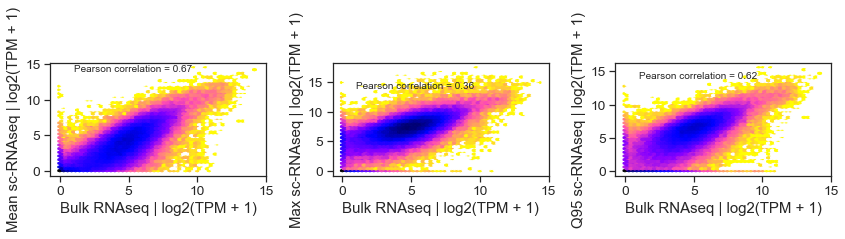

In [70]:
fig, axes = plt.subplots(figsize=(12,3), ncols=3)

for y_name, y_val, ax in zip(['Mean', 'Max', 'Q95'], [y_mean, y_max, y_q95], axes.flatten()):
    
    im = ax.hexbin(np.log2(x+1), np.log2(y_val+1), gridsize=50, bins='log', cmap='gnuplot2_r')
    ax.set_xlabel('Bulk RNAseq | log2(TPM + 1)')
    ax.set_ylabel('{} sc-RNAseq | log2(TPM + 1)'.format(y_name))
#     fig.colorbar(im, label='Log10(count + 1)')
    ax.text(x=1, y=14, s='Pearson correlation = {:.2f}'.format(stats.pearsonr(x, y_val)[0]), fontsize=10)
    
plt.tight_layout()

### Cluster frequency (per cell line)

In [71]:
cnt_per_cl_df = cell_df[['sample_id']].reset_index().groupby('sample_id').count()

In [72]:
cnt_per_cl_cluster_df = cell_df[['sample_id', 'cluster']].reset_index().groupby(['sample_id', 'cluster']).count()

In [73]:
# (cnt_per_cl_cluster_df / cnt_per_cl_df).reset_index().groupby('cell_line_id').sum()
percent_cl_cluster_df = (cnt_per_cl_cluster_df / cnt_per_cl_df) * 100
percent_cl_cluster_df.columns = ['percent']
percent_cl_cluster_df.head()

percent
sample_id cluster           
HN120M    A1        2.222222
          A2        1.111111
          G1       68.888889
          G2       24.444444
          L         3.333333

In [28]:
percent_cl_cluster_df.to_excel('../preprocessed_data/HN_patient_specific/percent_cl_cluster.xlsx')

### Abundance per patients

*For HN137 at patient level, we discard HN137P2*

In [74]:
cnt_per_patient_df = cell_df[cell_df['sample_id']!='HN137P2'][['patient_id']].reset_index().groupby('patient_id').count()

In [75]:
cnt_per_patient_cluster_df = cell_df[cell_df['sample_id']!='HN137P2'][['patient_id', 'cluster']].reset_index().groupby(['patient_id', 'cluster']).count()

In [76]:
# (cnt_per_cl_cluster_df / cnt_per_cl_df).reset_index().groupby('cell_line_id').sum()
percent_patient_cluster_df = (cnt_per_patient_cluster_df / cnt_per_patient_df) * 100
percent_patient_cluster_df.columns = ['percent']
percent_patient_cluster_df.head()

percent
patient_id cluster           
HN120      A1        1.098901
           A2        0.549451
           D1       31.318681
           D2       17.582418
           G1       34.065934

In [35]:
percent_patient_cluster_df.to_excel('../preprocessed_data/HN_patient_specific/percent_patient_cluster.xlsx')

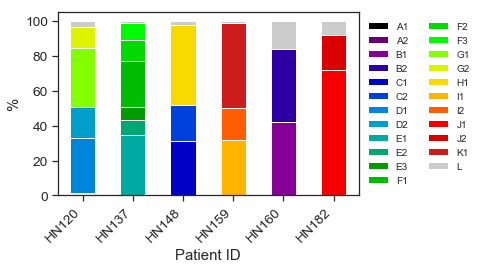

In [77]:
sns.set(font_scale=1.25, style='ticks')
fig, ax = plt.subplots(figsize=(6, 4))
percent_patient_cluster_df.reset_index().pivot_table(index='patient_id', columns='cluster', values='percent').fillna(0).plot(kind='bar', cmap='nipy_spectral', stacked=True, ax=ax)

# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=2, framealpha=0, prop={'size': 10})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_ylabel('%')
ax.set_xlabel('Patient ID')

plt.tight_layout()

### Select essential genes

In [78]:
ess_gene_list = pd.read_csv('../data/essential_genes.txt', header=None)[0].values.astype(str)
len(ess_gene_list)

1856

In [79]:
selected_ess_gene_list = [g for g in ess_gene_list if g in tmm_df.index]
len(selected_ess_gene_list)

1724

In [80]:
tmm_df = tmm_df.loc[selected_ess_gene_list]
tmm_df.shape

(1724, 1116)

### Cluster exp profile (average TMM)

In [81]:
temp_df = tmm_df.T
temp_df = pd.merge(temp_df, cell_df, left_index=True, right_index=True)
temp_df.shape

(1116, 1736)

In [82]:
cluster_tmm_df = temp_df.groupby('cluster')[selected_ess_gene_list].mean()

Previously calculate mean after log transform, now calculate before log transform

In [54]:
log2_fc_cluster_tmm_df = (np.log2(cluster_tmm_df + 1) - np.log2((cluster_tmm_df + 1).mean()))
log2_fc_cluster_tmm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.436395,0.625220,-0.263372,-0.065423,0.807717,0.506697,-0.096761,0.135278,0.327295,-0.038049,...,0.025145,0.534613,1.324412,1.531713,1.214819,1.114317,0.112083,-0.809624,0.192014,0.106663
A2,0.957639,1.014652,-0.618539,0.980821,0.782389,0.982589,-0.115262,0.191175,0.631318,-0.155082,...,0.489367,0.503697,1.297929,0.990642,0.258965,1.049667,0.636576,0.361209,0.287186,0.595437
B1,-0.465562,-0.947105,-1.354482,-0.277443,-1.372569,0.084114,-0.989848,-1.146878,1.175749,0.509475,...,0.898487,-0.829339,-0.797885,-0.752020,0.517016,-1.958157,-0.145795,0.937606,-1.223988,-1.208750
B2,-0.156186,-1.045014,-0.934238,0.190518,-0.719371,-0.407772,-1.219339,-0.818015,1.196029,-1.153296,...,0.776711,-0.360110,-1.705745,-1.051474,0.497569,-0.666891,-0.199646,2.252809,-0.772578,-1.404352
C1,-0.789281,-1.290047,-0.757683,-0.288350,1.411915,-0.880046,0.834822,1.330202,-1.041977,-1.555873,...,0.584703,-0.201043,-1.141682,0.292289,-0.699833,-0.427103,-1.257253,-1.061932,0.648026,-0.362471


In [55]:
log2_fc_cluster_tmm_df.mean()

AAAS       -0.201741
AAMP       -0.243841
AARS       -0.277883
AARS2      -0.136853
AASDHPPT   -0.253164
              ...   
ZNF622     -0.261983
ZNF830     -0.173053
ZNHIT2     -0.408170
ZNRD1      -0.207632
ZWINT      -0.509110
Length: 1724, dtype: float64

In [56]:
cluster_tmm_df.to_csv('../preprocessed_data/HN_patient_specific/cluster_tmm.csv')
log2_fc_cluster_tmm_df.to_csv('../preprocessed_data/HN_patient_specific/log2_fc_cluster_tmm.csv')

### Cluster exp profile (p95 TMM)

In [81]:
temp_df = tmm_df.T
temp_df = pd.merge(temp_df, cell_df, left_index=True, right_index=True)
temp_df.shape

(1116, 1736)

In [83]:
cluster_tmm_df = temp_df.groupby('cluster')[selected_ess_gene_list].quantile(.95)

Previously calculate mean after log transform, now calculate before log transform

In [84]:
log2_fc_cluster_tmm_df = (np.log2(cluster_tmm_df + 1) - np.log2((cluster_tmm_df + 1).mean()))
log2_fc_cluster_tmm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.581529,0.567866,0.136815,0.234432,0.525449,0.368117,0.291764,0.069337,0.167243,0.083656,...,0.147575,0.584662,1.622427,1.711271,1.749432,0.957465,0.159206,-0.254289,0.038121,0.440585
A2,0.741825,0.827329,-0.635273,1.878643,0.666011,0.739827,0.153049,0.096810,0.521036,0.055524,...,0.895826,0.503265,1.503968,0.983848,0.835427,0.957759,0.528779,1.270044,0.028240,0.619930
B1,0.795028,-0.371029,-1.295258,-0.362711,-0.705375,0.406485,-1.301647,-0.767651,1.540667,0.033686,...,1.110247,-1.108213,-1.405115,-0.818992,1.066678,-1.953661,0.350682,1.336072,-0.259621,-0.456599
B2,-0.050712,-1.051312,-0.426207,1.006330,-0.402121,0.097944,-1.201644,-0.311109,1.202510,-1.759760,...,0.651997,-0.473840,-2.768981,-1.134098,-0.172232,-0.774963,-0.055172,0.378419,-0.112609,-1.458663
C1,-1.204955,-1.362988,-0.991261,-0.504056,1.266665,-0.919131,0.523944,1.100556,-1.149855,-1.477574,...,0.469307,-0.754756,-1.783381,-0.103034,-1.373183,-1.036510,-1.005669,-1.784478,-0.004728,-0.397628


In [85]:
log2_fc_cluster_tmm_df.mean()

AAAS       -0.218368
AAMP       -0.250337
AARS       -0.242313
AARS2      -0.503346
AASDHPPT   -0.155981
              ...   
ZNF622     -0.224700
ZNF830     -0.142848
ZNHIT2     -0.621837
ZNRD1      -0.158765
ZWINT      -0.355011
Length: 1724, dtype: float64

In [86]:
cluster_tmm_df.to_csv('../preprocessed_data/HN_patient_specific/cluster_tmm_p95.csv')
log2_fc_cluster_tmm_df.to_csv('../preprocessed_data/HN_patient_specific/log2_fc_cluster_tmm_p95.csv')

### Log2 fold-change (cell level)

In [57]:
log2_fc_tmm_df = (np.log2(tmm_df.T + 1) - np.log2(tmm_df.T + 1).mean())
log2_fc_tmm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
RHH2176,-2.863885,-3.232319,3.712826,-0.378936,-5.646005,-4.505861,4.415740,2.566278,-6.137793,-1.792160,...,-4.082223,-2.401833,3.651983,4.809579,-0.442783,2.029046,5.906156,-0.594694,-3.643758,3.073703
RHH2177,3.978684,1.926361,0.479909,-0.378936,-5.646005,0.671943,2.322934,1.538586,0.875541,4.319660,...,-4.082223,-2.401833,-0.779374,-1.039243,-0.442783,0.948432,-2.196877,-0.594694,1.644199,3.174142
RHH2178,3.948620,-1.636553,5.108734,-0.378936,0.001077,-2.895827,2.799355,2.336224,-4.272534,-1.792160,...,0.162866,-2.401833,-0.779374,-1.039243,-0.442783,1.473867,2.739401,-0.594694,-3.643758,3.285973
RHH2179,-2.863885,1.948997,2.244602,-0.378936,-0.976134,1.930214,1.282823,1.388577,-0.459601,-1.792160,...,1.412444,1.334764,-0.779374,-1.039243,-0.442783,-3.603860,3.046971,-0.594694,-3.643758,2.957688
RHH2180,2.328418,0.322959,3.514244,-0.378936,-0.621785,2.126986,-3.374768,1.502579,-0.180368,1.263885,...,-0.167230,-2.401833,-0.779374,-1.039243,-0.442783,-3.603860,-0.138885,-0.594694,-3.643758,3.001192


In [58]:
log2_fc_tmm_df.mean()

AAAS        4.559475e-15
AAMP       -9.578161e-15
AARS       -2.199953e-15
AARS2       1.166928e-16
AASDHPPT   -9.592088e-15
                ...     
ZNF622      4.027046e-16
ZNF830      9.391134e-17
ZNHIT2     -1.297250e-16
ZNRD1      -2.971737e-15
ZWINT      -1.177075e-14
Length: 1724, dtype: float64

In [59]:
log2_fc_tmm_df.to_csv('../preprocessed_data/HN_patient_specific/log2_fc_tmm.csv')

### [TESTING] calculate fc_mat_norm.csv

In [44]:
mat_norm_df = pd.read_csv('../preprocessed_data/scRNAseq/AS_et_al_mat_norm.csv', index_col=0)
mat_norm_df = mat_norm_df[cell_df.index]
mat_norm_df.head()

,RHH2176,RHH2177,RHH2178,RHH2179,RHH2180,RHH2181,RHH2182,RHH2183,RHH2184,RHH2185,...,RHO707,RHO708,RHO709,RHO711,RHO712,RHO713,RHO714,RHO715,RHO716,RHO717
A2ML1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.055681,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
AAAS,0.0,0.433299,0.818982,0.0,0.165648,0.000000,0.0,0.731827,0.104433,0.956780,...,0.0,0.000000,0.157415,0.240023,0.052505,0.01466,0.141820,0.078456,0.0,0.000000
AACS,0.0,0.000000,0.000000,0.0,0.000000,0.022271,0.0,0.000000,0.000000,0.000000,...,0.0,0.010963,0.157415,0.460138,0.035308,0.00000,0.073422,0.208026,0.0,0.061757
AADAC,0.0,0.000000,0.740419,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.548487,0.000000,0.000000,0.00000,0.000000,0.370797,0.0,0.000000
AADAT,0.0,0.000000,0.000000,0.0,0.000000,0.764792,0.0,0.000000,0.000000,0.789582,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000


In [45]:
selected_ess_gene_list = [g for g in ess_gene_list if g in mat_norm_df.index]
len(selected_ess_gene_list)

1725

In [46]:
temp_df = mat_norm_df.T
temp_df = pd.merge(temp_df, cell_df, left_index=True, right_index=True)
temp_df.shape

(1116, 14894)

In [47]:
cluster_mat_norm_df = temp_df.groupby('cluster')[selected_ess_gene_list].mean()
cluster_mat_norm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.203942,0.251364,0.287192,0.021260,0.932246,0.469491,0.237488,1.177627,0.781101,0.060439,...,0.363770,0.180916,0.141534,0.223636,0.055004,0.491300,0.132271,0.009826,0.169033,0.646892
A2,0.260138,0.311930,0.273458,0.053836,0.891798,0.562975,0.217334,1.161445,0.907508,0.054967,...,0.435140,0.169147,0.129329,0.162555,0.025060,0.466529,0.163668,0.023077,0.167287,0.830410
B1,0.169208,0.162288,0.313887,0.033522,0.391745,0.378804,0.112958,0.912538,1.329696,0.109232,...,0.979944,0.116559,0.052198,0.088713,0.077773,0.156719,0.156215,0.076213,0.135590,0.482089
B2,0.205009,0.100318,0.341032,0.066469,0.509312,0.278734,0.119010,1.039062,1.260021,0.045461,...,0.953185,0.100230,0.015142,0.075573,0.057674,0.229027,0.125636,0.065257,0.130661,0.449586
C1,0.116291,0.073113,0.348676,0.017248,1.308609,0.264147,0.613081,2.106093,0.418565,0.032720,...,0.667573,0.189609,0.021305,0.174515,0.006136,0.276068,0.064438,0.005770,0.300613,0.687360


In [48]:
log2_fc_cluster_mat_norm_df = (cluster_mat_norm_df - np.log(np.power(np.e, cluster_mat_norm_df).mean()))
log2_fc_cluster_mat_norm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.019561,0.060424,-0.168444,-0.006504,0.244417,0.094687,-0.059026,-0.093287,0.067042,-0.019053,...,-0.107612,0.007493,0.079155,0.119430,0.028716,0.184167,-0.001990,-0.012368,-0.014521,-0.028685
A2,0.075756,0.120990,-0.182177,0.026072,0.203968,0.188171,-0.079181,-0.109469,0.193450,-0.024525,...,-0.036242,-0.004276,0.066949,0.058349,-0.001228,0.159396,0.029406,0.000882,-0.016268,0.154833
B1,-0.015174,-0.028653,-0.141749,0.005758,-0.296085,0.004000,-0.183557,-0.358376,0.615638,0.029740,...,0.508563,-0.056864,-0.010181,-0.015493,0.051485,-0.150414,0.021954,0.054018,-0.047965,-0.193488
B2,0.020628,-0.090622,-0.114604,0.038705,-0.178517,-0.096071,-0.177504,-0.231852,0.545963,-0.034031,...,0.481803,-0.073193,-0.047238,-0.028633,0.031386,-0.078107,-0.008626,0.043062,-0.052893,-0.225991
C1,-0.068090,-0.117828,-0.106959,-0.010516,0.620779,-0.110658,0.316566,0.835179,-0.295493,-0.046772,...,0.196192,0.016186,-0.041074,0.070309,-0.020152,-0.031066,-0.069824,-0.016425,0.117059,0.011783


In [49]:
cluster_mat_norm_df.to_csv('../preprocessed_data/HN_patient_specific/cluster_mat_norm.csv')
log2_fc_cluster_mat_norm_df.to_csv('../preprocessed_data/HN_patient_specific/log2_fc_cluster_mat_norm.csv')

### [TESTING] calculate fc_mat_norm_p95.csv

In [30]:
mat_norm_df = pd.read_csv('../preprocessed_data/scRNAseq/AS_et_al_mat_norm.csv', index_col=0)
mat_norm_df = mat_norm_df[cell_df.index]
mat_norm_df.head()

,RHH2176,RHH2177,RHH2178,RHH2179,RHH2180,RHH2181,RHH2182,RHH2183,RHH2184,RHH2185,...,RHO707,RHO708,RHO709,RHO711,RHO712,RHO713,RHO714,RHO715,RHO716,RHO717
A2ML1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.055681,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
AAAS,0.0,0.433299,0.818982,0.0,0.165648,0.000000,0.0,0.731827,0.104433,0.956780,...,0.0,0.000000,0.157415,0.240023,0.052505,0.01466,0.141820,0.078456,0.0,0.000000
AACS,0.0,0.000000,0.000000,0.0,0.000000,0.022271,0.0,0.000000,0.000000,0.000000,...,0.0,0.010963,0.157415,0.460138,0.035308,0.00000,0.073422,0.208026,0.0,0.061757
AADAC,0.0,0.000000,0.740419,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.548487,0.000000,0.000000,0.00000,0.000000,0.370797,0.0,0.000000
AADAT,0.0,0.000000,0.000000,0.0,0.000000,0.764792,0.0,0.000000,0.000000,0.789582,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000


In [31]:
selected_ess_gene_list = [g for g in ess_gene_list if g in mat_norm_df.index]
len(selected_ess_gene_list)

1725

In [32]:
temp_df = mat_norm_df.T
temp_df = pd.merge(temp_df, cell_df, left_index=True, right_index=True)
temp_df.shape

(1116, 14894)

In [33]:
cluster_mat_norm_df = temp_df.groupby('cluster')[selected_ess_gene_list].quantile(.95)
cluster_mat_norm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.808064,0.754596,1.273619,0.149320,1.686638,1.239720,0.977641,1.949532,1.524761,0.259986,...,0.934054,0.601157,0.787038,1.003581,0.369825,1.203358,0.557563,0.070844,0.561487,1.585200
A2,0.808471,0.901488,0.882168,0.404977,1.481084,1.203542,1.030581,1.768354,1.640080,0.261128,...,1.307099,0.639214,0.735579,0.849052,0.179211,1.127906,0.558872,0.169950,0.549437,1.779246
B1,0.968956,0.491382,1.004275,0.210315,1.174615,1.200530,0.464444,1.747822,2.310382,0.562958,...,2.087558,0.563906,0.348975,0.449483,0.542081,0.586554,0.799832,0.486178,0.973786,1.670682
B2,1.266707,0.383786,1.673308,0.562371,1.256393,1.296148,0.556649,2.221348,2.115790,0.241062,...,1.714830,0.618857,0.065007,0.372953,0.223569,0.959742,0.703203,0.264151,0.779010,1.191673
C1,0.412881,0.201336,0.796851,0.098539,1.970299,0.624915,1.344819,2.730899,0.852431,0.172872,...,1.302711,0.505131,0.081706,0.578164,0.034901,0.618396,0.283463,0.019165,0.605526,1.347100


In [34]:
log2_fc_cluster_mat_norm_df = (cluster_mat_norm_df - np.log(np.power(np.e, cluster_mat_norm_df).mean()))
log2_fc_cluster_mat_norm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.109002,0.139290,-0.046551,-0.019176,0.315467,0.203664,0.020599,-0.072330,0.070616,-0.102217,...,-0.183925,-0.066380,0.420613,0.450896,0.212579,0.283646,0.013667,-0.051155,-0.061974,0.076591
A2,0.109409,0.286182,-0.438002,0.236481,0.109913,0.167486,0.073540,-0.253508,0.185935,-0.101075,...,0.189120,-0.028324,0.369154,0.296367,0.021965,0.208194,0.014977,0.047952,-0.074025,0.270638
B1,0.269894,-0.123924,-0.315895,0.041819,-0.196555,0.164474,-0.492598,-0.274040,0.856237,0.200755,...,0.969579,-0.103632,-0.017450,-0.103202,0.384835,-0.333158,0.255936,0.364180,0.350325,0.162073
B2,0.567645,-0.231520,0.353139,0.393875,-0.114778,0.260092,-0.400392,0.199485,0.661644,-0.121141,...,0.596851,-0.048681,-0.301417,-0.179732,0.066323,0.040030,0.159307,0.142152,0.155549,-0.316936
C1,-0.286181,-0.413970,-0.523319,-0.069957,0.599128,-0.411141,0.387777,0.709037,-0.601714,-0.189332,...,0.184732,-0.162406,-0.284719,0.025478,-0.122345,-0.301316,-0.260433,-0.102833,-0.017935,-0.161508


In [35]:
cluster_mat_norm_df.to_csv('../preprocessed_data/HN_patient_specific/cluster_mat_norm_p95.csv')
log2_fc_cluster_mat_norm_df.to_csv('../preprocessed_data/HN_patient_specific/log2_fc_cluster_mat_norm_p95.csv')

### [TESTING] calculate fc_mat_norm_log2_p95.csv

In [40]:
mat_norm_df = pd.read_csv('../preprocessed_data/scRNAseq/AS_et_al_mat_norm.csv', index_col=0)
mat_norm_df = mat_norm_df[cell_df.index]
mat_norm_df.head()

,RHH2176,RHH2177,RHH2178,RHH2179,RHH2180,RHH2181,RHH2182,RHH2183,RHH2184,RHH2185,...,RHO707,RHO708,RHO709,RHO711,RHO712,RHO713,RHO714,RHO715,RHO716,RHO717
A2ML1,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.055681,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000
AAAS,0.0,0.433299,0.818982,0.0,0.165648,0.000000,0.0,0.731827,0.104433,0.956780,...,0.0,0.000000,0.157415,0.240023,0.052505,0.01466,0.141820,0.078456,0.0,0.000000
AACS,0.0,0.000000,0.000000,0.0,0.000000,0.022271,0.0,0.000000,0.000000,0.000000,...,0.0,0.010963,0.157415,0.460138,0.035308,0.00000,0.073422,0.208026,0.0,0.061757
AADAC,0.0,0.000000,0.740419,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.548487,0.000000,0.000000,0.00000,0.000000,0.370797,0.0,0.000000
AADAT,0.0,0.000000,0.000000,0.0,0.000000,0.764792,0.0,0.000000,0.000000,0.789582,...,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000


In [41]:
selected_ess_gene_list = [g for g in ess_gene_list if g in mat_norm_df.index]
len(selected_ess_gene_list)

1725

In [42]:
temp_df = mat_norm_df.T
temp_df = pd.merge(temp_df, cell_df, left_index=True, right_index=True)
temp_df.shape

(1116, 14894)

In [43]:
cluster_mat_norm_df = temp_df.groupby('cluster')[selected_ess_gene_list].quantile(.95)
cluster_mat_norm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.808064,0.754596,1.273619,0.149320,1.686638,1.239720,0.977641,1.949532,1.524761,0.259986,...,0.934054,0.601157,0.787038,1.003581,0.369825,1.203358,0.557563,0.070844,0.561487,1.585200
A2,0.808471,0.901488,0.882168,0.404977,1.481084,1.203542,1.030581,1.768354,1.640080,0.261128,...,1.307099,0.639214,0.735579,0.849052,0.179211,1.127906,0.558872,0.169950,0.549437,1.779246
B1,0.968956,0.491382,1.004275,0.210315,1.174615,1.200530,0.464444,1.747822,2.310382,0.562958,...,2.087558,0.563906,0.348975,0.449483,0.542081,0.586554,0.799832,0.486178,0.973786,1.670682
B2,1.266707,0.383786,1.673308,0.562371,1.256393,1.296148,0.556649,2.221348,2.115790,0.241062,...,1.714830,0.618857,0.065007,0.372953,0.223569,0.959742,0.703203,0.264151,0.779010,1.191673
C1,0.412881,0.201336,0.796851,0.098539,1.970299,0.624915,1.344819,2.730899,0.852431,0.172872,...,1.302711,0.505131,0.081706,0.578164,0.034901,0.618396,0.283463,0.019165,0.605526,1.347100


In [50]:
log2_fc_cluster_mat_norm_df = (np.log2(cluster_mat_norm_df+1) - np.log2(cluster_mat_norm_df+1).mean())
log2_fc_cluster_mat_norm_df.head()

,AAAS,AAMP,AARS,AARS2,AASDHPPT,AATF,ABCB7,ABCE1,ABCF1,ABHD11,...,ZNF22,ZNF259,ZNF335,ZNF407,ZNF574,ZNF622,ZNF830,ZNHIT2,ZNRD1,ZWINT
cluster,,,,,,,,,,,,,,,,,,,,,
A1,0.130681,0.155404,0.027316,0.002885,0.214390,0.161794,0.072084,0.015985,0.121292,-0.089225,...,-0.061419,-0.022339,0.441585,0.406982,0.264899,0.230891,0.041804,-0.048418,-0.013386,0.134637
A2,0.131007,0.271393,-0.245280,0.292652,0.099559,0.138301,0.110196,-0.075472,0.185727,-0.087917,...,0.193033,0.011549,0.399431,0.291187,0.048729,0.180622,0.043016,0.079281,-0.024563,0.239054
B1,0.253667,-0.079085,-0.154595,0.077487,-0.090651,0.136327,-0.361344,-0.086212,0.512143,0.221647,...,0.613419,-0.056301,0.035878,-0.060060,0.435787,-0.242916,0.250376,0.424441,0.324659,0.181569
B2,0.456834,-0.187115,0.260951,0.445842,-0.037393,0.197692,-0.273253,0.143163,0.424743,-0.111057,...,0.427814,-0.006479,-0.305122,-0.138317,0.102003,0.061851,0.170764,0.191002,0.174768,-0.103607
C1,-0.225124,-0.391096,-0.312205,-0.062309,0.359197,-0.301160,0.317780,0.355022,-0.325435,-0.192587,...,0.190286,-0.111565,-0.282678,0.062648,-0.139599,-0.214248,-0.237445,-0.119778,0.026740,-0.004760


In [51]:
cluster_mat_norm_df.to_csv('../preprocessed_data/HN_patient_specific/cluster_mat_norm_log2_p95.csv')
log2_fc_cluster_mat_norm_df.to_csv('../preprocessed_data/HN_patient_specific/log2_fc_cluster_mat_norm_log2_p95.csv')

### t-SNE (NOT IN USE)

Already changed to UMAP

In [60]:
from sklearn.manifold import TSNE

X = log2_fc_tmm_df.values
X_embedded = TSNE(n_components=2).fit_transform(X)
X_embedded.shape

(1116, 2)

In [61]:
tsne_df = pd.DataFrame(X_embedded, index=log2_fc_tmm_df.index, columns=['tSNE1', 'tSNE2'])
tsne_df = pd.merge(tsne_df, cell_df, left_index=True, right_index=True)
tsne_df.head()

,tSNE1,tSNE2,sample_id,batch,cell_number,n_genes,percent_mito,n_counts,louvain,louvain2,cluster,UMAP1,UMAP2,patient_id
RHH2176,2.851946,10.360536,HN120P,RHH,2176,3602,0.080225,998435.90,11,NaN,L,3.546686,-0.249621,HN120
RHH2177,-0.040760,8.018424,HN120P,RHH,2177,5748,0.089887,997598.06,3,0.0,D1,-3.736655,-4.481306,HN120
RHH2178,3.531928,13.163946,HN120P,RHH,2178,6648,0.117123,995340.75,3,0.0,D1,-4.161313,-4.560451,HN120
RHH2179,0.859202,7.233406,HN120P,RHH,2179,7076,0.104144,995187.60,3,0.0,D1,-4.607369,-4.124364,HN120
RHH2180,0.320757,8.042154,HN120P,RHH,2180,7261,0.111637,993863.56,3,0.0,D1,-5.340749,-4.571555,HN120


In [62]:
# tsne_df.to_csv('../preprocessed_data/HN_patient_specific/tsne.csv')